<a href="https://colab.research.google.com/github/Sudhanshu-Mittal-2024/Deep_Learning_Exercises/blob/main/Human_Action_Recognition_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -q -O human_action_recognition.zip https://www.dropbox.com/scl/fi/me09bksgk4gpkj9e63a4w/Human-Action-Recognition.zip?rlkey=0w0fhm2l0kolclytsbr8bp97s&dl=0

In [3]:
!unzip -q /content/human_action_recognition.zip

In [4]:
import os
os.listdir('/content/Human Action Recognition')

['train', '.DS_Store', 'Training_set.csv', 'Testing_set.csv', 'test']

In [5]:
!rm -rf '/content/Human Action Recognition/.DS_Store'
!rm -rf '/content/__MACOSX'
os.listdir('/content/Human Action Recognition')

['train', 'Training_set.csv', 'Testing_set.csv', 'test']

In [6]:
train_floder_path='/content/Human Action Recognition/train'
test_folder_path='/content/Human Action Recognition/test'

In [7]:
filenames=[train_floder_path+'/'+file for file in os.listdir(train_floder_path)]

In [8]:
import pandas as pd
import numpy as np

In [9]:
len(filenames)

12601

In [10]:
training_data=pd.read_csv('/content/Human Action Recognition/Training_set.csv')
training_data.shape

(12600, 2)

In [11]:
training_data=training_data[training_data['filename'].isin(os.listdir(train_floder_path))]

In [26]:
training_data.head()
for _, row in training_data.iterrows():
  if row['filename']=='Image_10169(1).jpg':
    print(row)

In [13]:
import shutil

In [19]:
def move_images(path):
  for _, train_data in training_data.iterrows():
    image_name = train_data['filename']
    label = train_data['label']

    source = os.path.join(path, image_name)
    destination = os.path.join(path, label)
    destination_path = os.path.join(destination, image_name)

    os.makedirs(destination, exist_ok=True)
    if os.path.exists(source):
      shutil.move(source, destination_path)

In [20]:
move_images(train_floder_path)

In [27]:
move_images(test_folder_path)

In [28]:
import matplotlib.pyplot as plt

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import preprocess_input

In [30]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [31]:
from tensorflow.keras.models import Model

In [32]:
x = base_model.output
global_pool = GlobalAveragePooling2D(name='global_avg_pooling')(x)
dense1 = Dense(128, activation='relu', name='dense1')(global_pool)
dropout = Dropout(0.2, name='dropout')(dense1)

output = Dense(15, activation='softmax', name='output')(dropout)
model = Model(inputs=base_model.input, outputs=output)

In [33]:
for layer in base_model.layers:
  layer.trainable = False

In [34]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,851,919 (90.99 MB)

 Trainable params: 264,207 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
train_floder_path,test_folder_path

('/content/Human Action Recognition/train',
 '/content/Human Action Recognition/test')

In [38]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [39]:
train_generator = train_datagen.flow_from_directory(train_floder_path,
                                                    target_size=(224,224),
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    shuffle=False
                                                    )
test_generator = test_datagen.flow_from_directory(test_folder_path,
                                                    target_size=(224,224),
                                                    batch_size=16,
                                                    class_mode='categorical')

Found 12600 images belonging to 15 classes.
Found 5400 images belonging to 15 classes.


In [40]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size

steps_per_epoch, validation_steps

(787, 337)

In [41]:
model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=3,
                    validation_data=test_generator,
                    validation_steps=validation_steps
          )

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


787/787 ━━━━━━━━━━━━━━━━━━━━ 317s 382ms/step - accuracy: 0.0652 - loss: 2.8272 - val_accuracy: 0.0697 - val_loss: 2.7416
Epoch 2/3
  1/787 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.4375 - loss: 2.4501

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4375 - loss: 2.4501 - val_accuracy: 0.0000e+00 - val_loss: 2.7486
Epoch 3/3
787/787 ━━━━━━━━━━━━━━━━━━━━ 317s 388ms/step - accuracy: 0.0951 - loss: 2.6577 - val_accuracy: 0.0662 - val_loss: 2.7531


In [42]:
from tensorflow.keras.preprocessing import image

In [47]:
def process_image_for_validation(my_image):
  img=image.load_img(my_image,target_size=(224,224))
  x=image.img_to_array(img)
  x=preprocess_input(x)
  x=np.expand_dims(x,axis=0)
  return x

In [51]:
import matplotlib.pyplot as plt

In [60]:
def predict_image(my_image):
  prediction = model.predict(process_image_for_validation(my_image))
def predict_image(my_image):
  prediction = model.predict(process_image_for_validation(my_image))
  predicted_class = np.argmax(prediction)
  class_labels = {v: k for k, v in train_generator.class_indices.items()}
  print(f"{my_image} ------Prediction Class from Model: {class_labels[predicted_class]} Having Probability: {prediction[0, predicted_class]:.2f}")

In [61]:
my_images=[]
my_images=['/content/Human Action Recognition/test/Image_1872(1).jpg','/content/Human Action Recognition/test/Image_1873(1).jpg',
             '/content/Human Action Recognition/test/Image_1874(1).jpg','/content/Human Action Recognition/test/Image_1875(1).jpg',
             '/content/Human Action Recognition/test/Image_1876(1).jpg','/content/Human Action Recognition/test/Image_1877(1).jpg',
             '/content/Human Action Recognition/test/Image_1878(1).jpg','/content/Human Action Recognition/test/Image_1879(1).jpg',
             '/content/Human Action Recognition/test/Image_188(1).jpg','/content/Human Action Recognition/test/Image_1880(1).jpg']

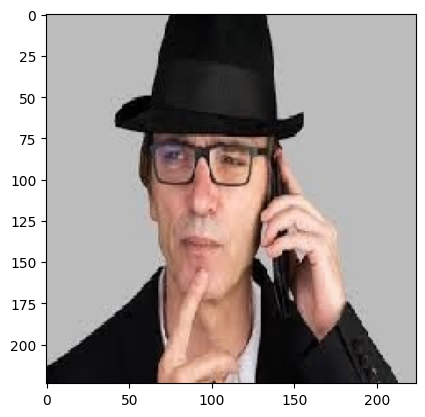

In [63]:
from tensorflow.keras.preprocessing import image
for my_image in my_images:
  img=image.load_img(my_image,target_size=(224,224))
  plt.imshow(img)

In [64]:
for my_image in my_images:
  predict_image(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
/content/Human Action Recognition/test/Image_1872(1).jpg ------Prediction Class from Model: eating Having Probability: 0.08
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
/content/Human Action Recognition/test/Image_1873(1).jpg ------Prediction Class from Model: dancing Having Probability: 0.11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
/content/Human Action Recognition/test/Image_1874(1).jpg ------Prediction Class from Model: dancing Having Probability: 0.13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
/content/Human Action Recognition/test/Image_1875(1).jpg ------Prediction Class from Model: fighting Having Probability: 0.07
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
/content/Human Action Recognition/test/Image_1876(1).jpg ------Prediction Class from Model: sitting Having Probability: 0.10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
/content/Human Action Recognition/test/Image_1877(1).jpg ------Prediction Class from Model: using_laptop Having Probability: 0.07
1/1 ━━━━━━━━━━━━━